### Bank Marketing Classification Project

The objective of this teamwork is to implement a step-by-step classification analysis using Python's machine learning, data analysis, manipulation, and visualization libraries such as Scikit-Learn, Pandas, NumPy, and Matplotlib.

The entire project has been divided into three steps, which include data preprocessing and visualization, training the ML model, and model tuning and validation.

### **Project Description:**      

This machine learning project is a classification task that has real-world applications in marketing and financial institutions. The project focuses on predicting whether a client will subscribe to a term deposit in a bank, based on a set of features obtained through marketing campaigns. This project offers a hands-on opportunity to apply various data preprocessing techniques, build and evaluate classification models, and make informed decisions based on the results.

### **Project Goal:**

The primary goal of this project is to develop an accurate classification model that can assist the bank's marketing team in identifying potential clients who are more likely to subscribe to term deposits. By achieving this goal, the bank can optimize its marketing efforts, reduce costs, and improve the overall efficiency of its campaigns.

### **Potential Real-World Applications:**

Understanding the outcome of this classification task has several practical applications:

**1. Marketing Strategy Optimization:** The bank can use the predictive model to prioritize potential clients who are more likely to subscribe. This allows them to tailor marketing strategies and allocate resources more effectively, leading to higher conversion rates and reduced marketing expenses.

**2. Resource Allocation:** The model's predictions can help the bank allocate resources, such as marketing personnel and budget, to regions or customer segments that are more likely to yield positive results.

**3. Customer Relationship Management:** By identifying potential subscribers, the bank can personalize communication and services to meet the specific needs and preferences of clients, enhancing customer satisfaction and loyalty.

**4. Risk Assessment:** The model can assist in assessing the risk associated with marketing campaigns. By identifying clients less likely to subscribe, the bank can avoid aggressive marketing approaches that could lead to negative customer experiences.

### **Project Significance:**

This project mirrors real-world challenges faced by marketing teams in financial institutions. By successfully completing this project, students will not only gain technical skills in machine learning but also learn how to apply their knowledge to solve practical business problems. They will understand the importance of data-driven decision-making and how classification models can have a significant impact on marketing and resource allocation strategies.

### **Project Outcome:**

Developed and evaluated a classification model capable of predicting term deposit subscriptions. Being able to justify model selection and discuss its potential applications in marketing and financial institutions.

### **Step 1: Data Visualization and Preprocessing**

In [1]:
# Import necessary libraries
import os
import requests
from urllib.parse import urlparse

# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models and utilities
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# Model evaluation and selection
from sklearn.model_selection import (
    train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
)
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    accuracy_score, recall_score, roc_curve
)

# Visualization settings
%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 7)

# Suppress warnings for clean output
import warnings
warnings.filterwarnings('ignore')

In [2]:
download_urls = [
    "https://archive.ics.uci.edu/static/public/222/bank+marketing.zip",
]
downloads_folder = 'downloads'

def download_file(url, save_path):
    response = requests.get(url)
    if response.status_code == 200:
        with open(save_path, 'wb') as f:
            f.write(response.content)
        return True
    else:
        print(f"Failed to download {url}")
        return False

def extract_all_zips(folder_path):
    zip_files = [f for f in os.listdir(folder_path) if f.endswith('.zip')]
    for zip_file in zip_files:
        zip_path = os.path.join(folder_path, zip_file)
        extract_folder = os.path.splitext(zip_path)[0]
        with ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_folder)
        os.remove(zip_path)
        print(f"Extracted zip file: {zip_path}")
        extract_all_zips(extract_folder)

def download_extract():
    downloads_folder = 'downloads'
    if not os.path.exists(downloads_folder):
        os.makedirs(downloads_folder)

    for url in download_urls:
        parsed_url = urlparse(url)
        filename = os.path.basename(parsed_url.path)

        file_path = os.path.join(downloads_folder, filename)
        if download_file(url, file_path):
            print(f"Downloaded file: {file_path}")

            if file_path.endswith('.zip'):
                extract_folder = os.path.splitext(file_path)[0]
                with ZipFile(file_path, 'r') as zip_ref:
                    zip_ref.extractall(extract_folder)
                os.remove(file_path)
                print(f"Extracted zip file: {file_path}")
                extract_all_zips(extract_folder)
                
if __name__ == "__main__":
    download_extract()

Downloaded file: downloads\bank+marketing.zip
Extracted zip file: downloads\bank+marketing.zip
Extracted zip file: downloads\bank+marketing\bank-additional.zip
Extracted zip file: downloads\bank+marketing\bank.zip


In [3]:
downloads_folder = 'downloads'
extracted_folder = os.path.join(downloads_folder, 'bank+marketing', 'bank')
csv_file_path = os.path.join(extracted_folder, 'bank-full.csv')

df = pd.read_csv(csv_file_path, delimiter=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
# Explore the data:
# 1. Display the first few rows
# 2. Get data type information
# 3. Get summary statistics
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
# Split data into training and testing sets
X = df.drop(columns=['y'])
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Handle missing values (e.g., replace missing values with the mean of the column)
missing_values = df.isnull().sum()

In [8]:
print("Missing values:")
print(missing_values)

# Encoding categorical features (e.g., one-hot encoding)
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Categorical columns:", categorical_columns)

df_encoded = pd.get_dummies(df, columns=categorical_columns)

df_encoded

Missing values:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
2,33,2,5,76,1,-1,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
3,47,1506,5,92,1,-1,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,1,0,0,0,0,1,0,0,1
45209,57,668,17,508,4,-1,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0


In [9]:
# Data Scaling (normalize numerical features)
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

scaler = MinMaxScaler()

df_scaled = df_encoded.copy()
df_scaled[numerical_columns] = scaler.fit_transform(df_scaled[numerical_columns])

df_scaled

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,0.519481,0.092259,0.133333,0.053070,0.000000,0.000000,0.000000,0,0,0,...,1,0,0,0,0,0,0,1,1,0
1,0.337662,0.073067,0.133333,0.030704,0.000000,0.000000,0.000000,0,0,0,...,1,0,0,0,0,0,0,1,1,0
2,0.194805,0.072822,0.133333,0.015453,0.000000,0.000000,0.000000,0,0,1,...,1,0,0,0,0,0,0,1,1,0
3,0.376623,0.086476,0.133333,0.018707,0.000000,0.000000,0.000000,0,1,0,...,1,0,0,0,0,0,0,1,1,0
4,0.194805,0.072812,0.133333,0.040260,0.000000,0.000000,0.000000,0,0,0,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,0.080293,0.533333,0.198658,0.032258,0.000000,0.000000,0,0,0,...,0,1,0,0,0,0,0,1,0,1
45207,0.688312,0.088501,0.533333,0.092721,0.016129,0.000000,0.000000,0,0,0,...,0,1,0,0,0,0,0,1,0,1
45208,0.701299,0.124689,0.533333,0.229158,0.064516,0.212156,0.010909,0,0,0,...,0,1,0,0,0,0,1,0,0,1
45209,0.506494,0.078868,0.533333,0.103294,0.048387,0.000000,0.000000,0,1,0,...,0,1,0,0,0,0,0,1,1,0


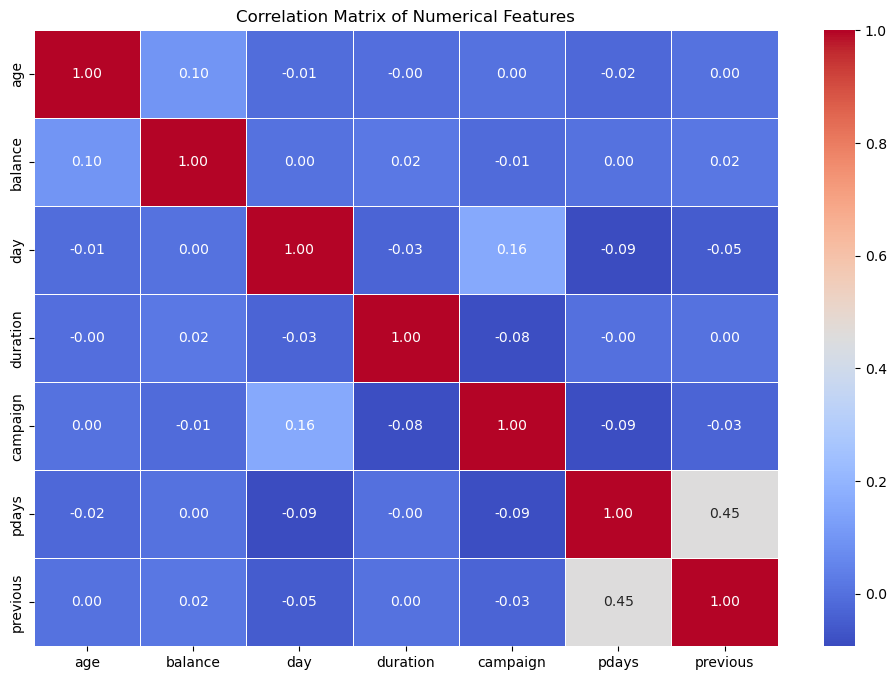

In [10]:
# Data Visualization (e.g., histograms, box plots, and correlation matrices)
plt.figure(figsize=(12, 8))
sns.heatmap(df_scaled[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

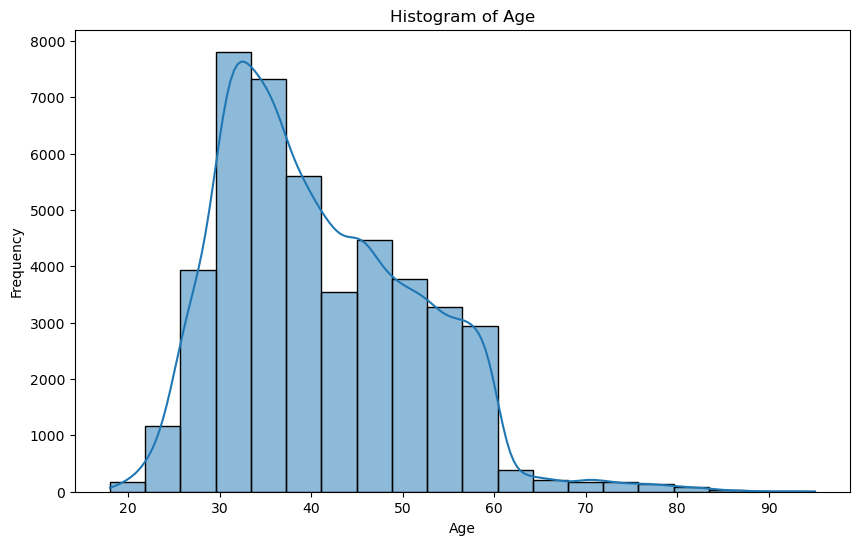

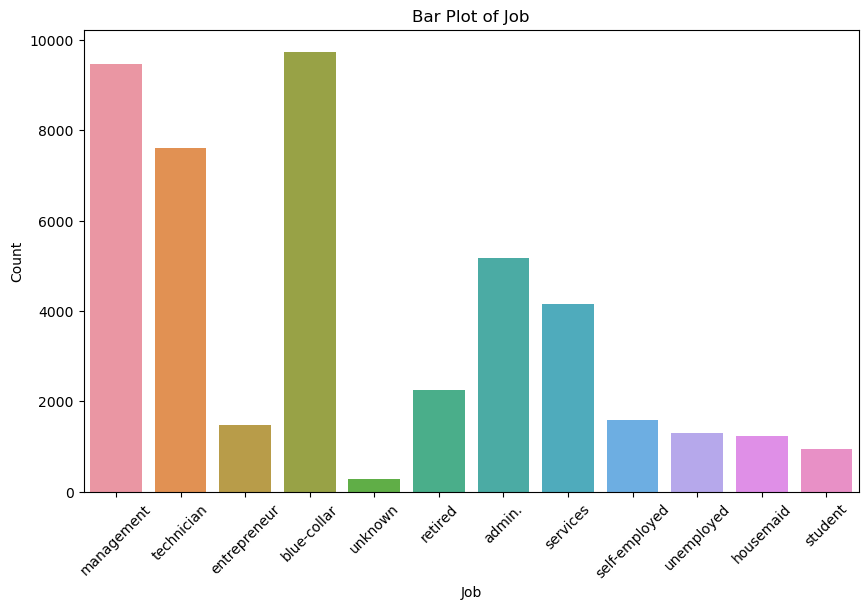

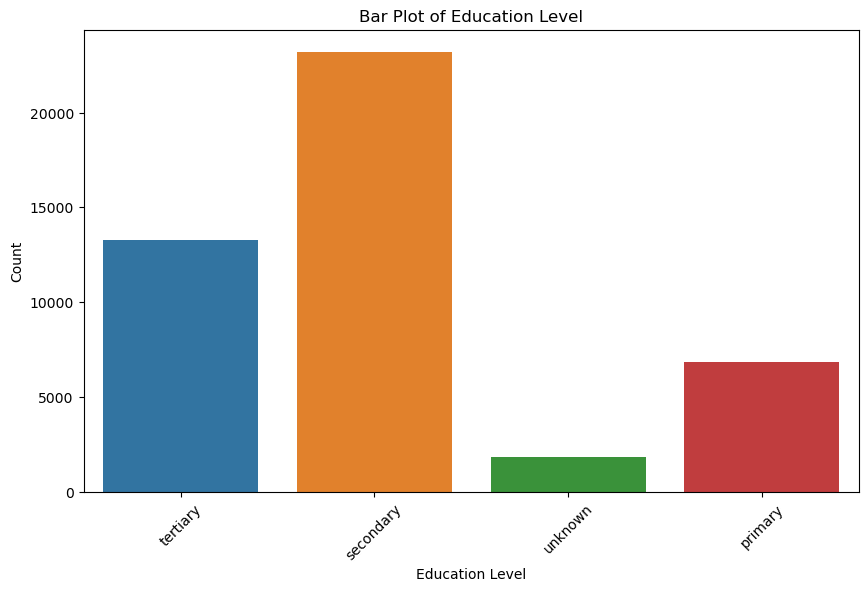

In [11]:
# Histogram of age
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', bins=20, kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Bar plot of job
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='job')
plt.title('Bar Plot of Job')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Bar plot of education level
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='education')
plt.title('Bar Plot of Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### **Step 2: Training Three Classification Models**

In [13]:
# Step 2: Training Three Classification Models

In [14]:
# Preprocessing for data

In [15]:
# replacing yes and no from deposit column by 1 and 0 to convert categorical feature to numerical feature
df['y'].replace(to_replace='yes', value=1, inplace=True)
df['y'].replace(to_replace='no',  value=0, inplace=True)
df['y'].head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [16]:
# replacing yes and no from loan column by 1 and 0 to convert categorical feature to numerical feature
df['loan'].replace(to_replace='no', value=1, inplace=True)
df['loan'].replace(to_replace='yes',  value=0, inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,1,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,1,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,0,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,1,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,1,unknown,5,may,198,1,-1,0,unknown,0


In [17]:
# replacing yes and no from default column by 1 and 0 to convert categorical feature to numerical feature
df['default'].replace(to_replace='no', value=1, inplace=True)
df['default'].replace(to_replace='yes',  value=0, inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,1,2143,yes,1,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,1,29,yes,1,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,1,2,yes,0,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1,1506,yes,1,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,1,no,1,unknown,5,may,198,1,-1,0,unknown,0


In [19]:
df["loan"].value_counts()

loan
1    37967
0     7244
Name: count, dtype: int64

In [20]:
# replacing yes and no from housing column by 1 and 0 to convert categorical feature to numerical feature
df['housing'].replace(to_replace='no', value=1, inplace=True)
df['housing'].replace(to_replace='yes',  value=0, inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,1,2143,0,1,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,1,29,0,1,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,1,2,0,0,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1,1506,0,1,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,1,1,1,unknown,5,may,198,1,-1,0,unknown,0


In [21]:
# one hot encoding for marital feature to convert categorical feature to numerical feature
# dropping original column
# dropping one of the martial columns

one_hot = pd.get_dummies(df['marital'])
df = df.drop('marital',axis = 1)
df = df.join(one_hot)

In [22]:
# one hot encoding for education feature to convert categorical feature to numerical feature
# dropping original column
# dropping one of the resultant columns

one_hot = pd.get_dummies(df['education'])
df = df.drop('education',axis = 1)
df = df.join(one_hot)
df = df.drop('unknown',axis = 1)
df.head()

,age,job,default,balance,housing,loan,contact,day,month,duration,...,pdays,previous,poutcome,y,divorced,married,single,primary,secondary,tertiary
0,58,management,1,2143,0,1,unknown,5,may,261,...,-1,0,unknown,0,False,True,False,False,False,True
1,44,technician,1,29,0,1,unknown,5,may,151,...,-1,0,unknown,0,False,False,True,False,True,False
2,33,entrepreneur,1,2,0,0,unknown,5,may,76,...,-1,0,unknown,0,False,True,False,False,True,False
3,47,blue-collar,1,1506,0,1,unknown,5,may,92,...,-1,0,unknown,0,False,True,False,False,False,False
4,33,unknown,1,1,1,1,unknown,5,may,198,...,-1,0,unknown,0,False,False,True,False,False,False


In [23]:
df = df.drop('divorced',axis = 1)

In [24]:
df.head()

,age,job,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,married,single,primary,secondary,tertiary
0,58,management,1,2143,0,1,unknown,5,may,261,1,-1,0,unknown,0,True,False,False,False,True
1,44,technician,1,29,0,1,unknown,5,may,151,1,-1,0,unknown,0,False,True,False,True,False
2,33,entrepreneur,1,2,0,0,unknown,5,may,76,1,-1,0,unknown,0,True,False,False,True,False
3,47,blue-collar,1,1506,0,1,unknown,5,may,92,1,-1,0,unknown,0,True,False,False,False,False
4,33,unknown,1,1,1,1,unknown,5,may,198,1,-1,0,unknown,0,False,True,False,False,False


In [25]:
one_hot = pd.get_dummies(df['job'])
df = df.drop('job',axis = 1)
df = df.join(one_hot)
df = df.drop('unknown',axis = 1)
df.head()

,age,default,balance,housing,loan,contact,day,month,duration,campaign,...,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,58,1,2143,0,1,unknown,5,may,261,1,...,False,False,False,True,False,False,False,False,False,False
1,44,1,29,0,1,unknown,5,may,151,1,...,False,False,False,False,False,False,False,False,True,False
2,33,1,2,0,0,unknown,5,may,76,1,...,False,True,False,False,False,False,False,False,False,False
3,47,1,1506,0,1,unknown,5,may,92,1,...,True,False,False,False,False,False,False,False,False,False
4,33,1,1,1,1,unknown,5,may,198,1,...,False,False,False,False,False,False,False,False,False,False


In [26]:
# one hot encoding for contact feature to convert categorical feature to numerical feature
# dropping original column
# dropping one of the contact columns

one_hot = pd.get_dummies(df['contact'])
df = df.drop('contact',axis = 1)
df = df.join(one_hot)
df = df.drop('unknown',axis = 1)
df.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,housemaid,management,retired,self-employed,services,student,technician,unemployed,cellular,telephone
0,58,1,2143,0,1,5,may,261,1,-1,...,False,True,False,False,False,False,False,False,False,False
1,44,1,29,0,1,5,may,151,1,-1,...,False,False,False,False,False,False,True,False,False,False
2,33,1,2,0,0,5,may,76,1,-1,...,False,False,False,False,False,False,False,False,False,False
3,47,1,1506,0,1,5,may,92,1,-1,...,False,False,False,False,False,False,False,False,False,False
4,33,1,1,1,1,5,may,198,1,-1,...,False,False,False,False,False,False,False,False,False,False


In [27]:
# one hot encoding for month feature to convert categorical feature to numerical feature
# dropping original column
# dropping one of the month columns

one_hot = pd.get_dummies(df['month'])
df = df.drop('month',axis = 1)
df = df.join(one_hot)
df = df.drop('dec',axis = 1)
df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,aug,feb,jan,jul,jun,mar,may,nov,oct,sep
0,58,1,2143,0,1,5,261,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
1,44,1,29,0,1,5,151,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
2,33,1,2,0,0,5,76,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
3,47,1,1506,0,1,5,92,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
4,33,1,1,1,1,5,198,1,-1,0,...,False,False,False,False,False,False,True,False,False,False


In [28]:
# one hot encoding for poutcome feature to convert categorical feature to numerical feature
# dropping original column
# dropping one of the resultant columns

one_hot = pd.get_dummies(df['poutcome'])
df = df.drop('poutcome',axis = 1)
df = df.join(one_hot)
df = df.drop('other',axis = 1)
df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,jul,jun,mar,may,nov,oct,sep,failure,success,unknown
0,58,1,2143,0,1,5,261,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
1,44,1,29,0,1,5,151,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
2,33,1,2,0,0,5,76,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
3,47,1,1506,0,1,5,92,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
4,33,1,1,1,1,5,198,1,-1,0,...,False,False,False,True,False,False,False,False,False,True


In [29]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            45211 non-null  int64
 1   default        45211 non-null  int64
 2   balance        45211 non-null  int64
 3   housing        45211 non-null  int64
 4   loan           45211 non-null  int64
 5   day            45211 non-null  int64
 6   duration       45211 non-null  int64
 7   campaign       45211 non-null  int64
 8   pdays          45211 non-null  int64
 9   previous       45211 non-null  int64
 10  y              45211 non-null  int64
 11  married        45211 non-null  bool 
 12  single         45211 non-null  bool 
 13  primary        45211 non-null  bool 
 14  secondary      45211 non-null  bool 
 15  tertiary       45211 non-null  bool 
 16  admin.         45211 non-null  bool 
 17  blue-collar    45211 non-null  bool 
 18  entrepreneur   45211 non-null  bool 
 19  hous

In [30]:
tempDF=df['y']

In [31]:
df=df.drop('y',axis=1)

In [32]:
df['y']=tempDF
df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,jun,mar,may,nov,oct,sep,failure,success,unknown,y
0,58,1,2143,0,1,5,261,1,-1,0,...,False,False,True,False,False,False,False,False,True,0
1,44,1,29,0,1,5,151,1,-1,0,...,False,False,True,False,False,False,False,False,True,0
2,33,1,2,0,0,5,76,1,-1,0,...,False,False,True,False,False,False,False,False,True,0
3,47,1,1506,0,1,5,92,1,-1,0,...,False,False,True,False,False,False,False,False,True,0
4,33,1,1,1,1,5,198,1,-1,0,...,False,False,True,False,False,False,False,False,True,0


In [33]:
scaler=StandardScaler()
scaler.fit(df.drop('y',axis=1))
scaled_features=scaler.transform(df.drop('y',axis=1))
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,jul,jun,mar,may,nov,oct,sep,failure,success,unknown
0,1.606965,0.13549,0.256419,-0.893915,0.436803,-1.298476,0.011016,-0.569351,-0.411453,-0.25194,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.348687,-0.185948,0.472519
1,0.288529,0.13549,-0.437895,-0.893915,0.436803,-1.298476,-0.416127,-0.569351,-0.411453,-0.25194,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.348687,-0.185948,0.472519
2,-0.747384,0.13549,-0.446762,-0.893915,-2.289359,-1.298476,-0.707361,-0.569351,-0.411453,-0.25194,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.348687,-0.185948,0.472519
3,0.571051,0.13549,0.047205,-0.893915,0.436803,-1.298476,-0.645231,-0.569351,-0.411453,-0.25194,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.348687,-0.185948,0.472519
4,-0.747384,0.13549,-0.447091,1.118674,0.436803,-1.298476,-0.233620,-0.569351,-0.411453,-0.25194,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.348687,-0.185948,0.472519


In [34]:
df_feat['y']=tempDF

In [35]:
### Correlation with Class variable 'y' deposit
CorrBank=df_feat.drop("y", axis=1).apply(lambda x: x.corr(df_feat.y))

In [36]:
# Arranging in descending order
Corr2=CorrBank.sort_values(ascending=False)

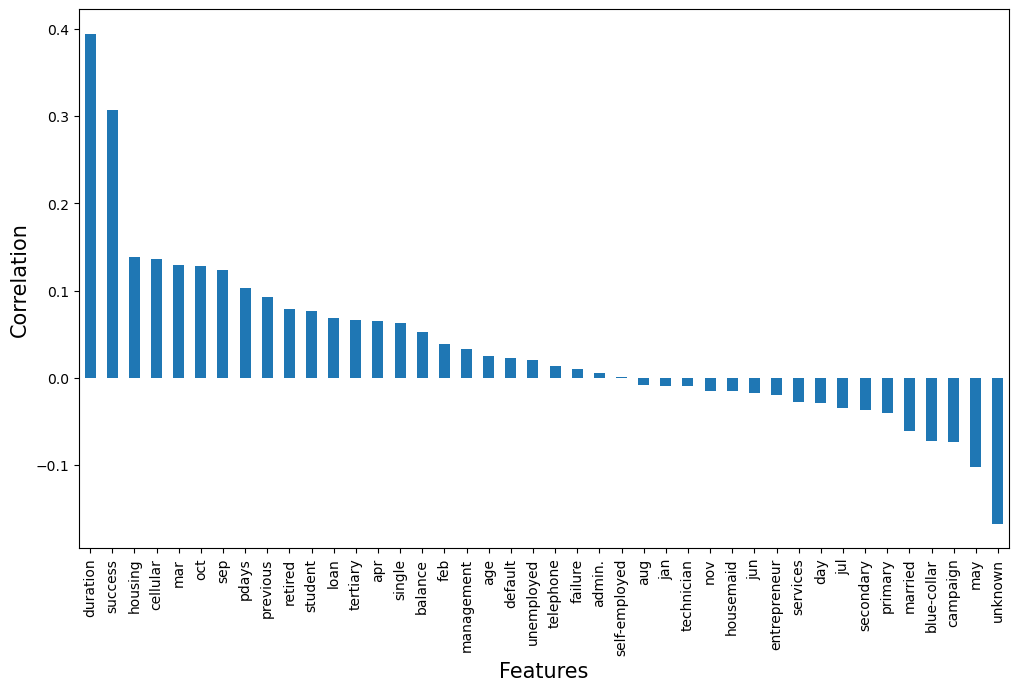

In [37]:
Corr2.plot.bar()
plt.xlabel("Features", fontsize=15)
plt.ylabel("Correlation", fontsize=15)

plt.show()

As we can see from the plot duration is a very important feature. 

This is the duration of last call with client. If the call duration is more , there are higher chances of getting a yes from the client. It has been sorted in descending order. Succes , cellular, housing, unknown, campaign are also highly correlated

In [38]:
# Model Selection

In [39]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

<Axes: xlabel='y', ylabel='count'>

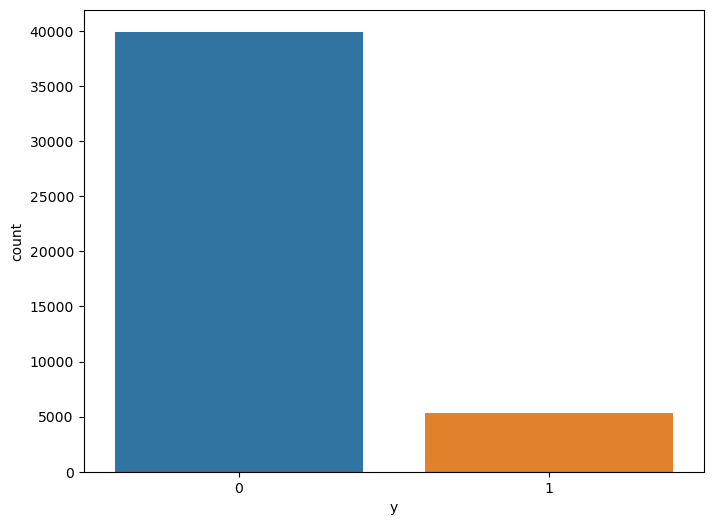

In [40]:
# count plot for deposit
#the dataset is fairly balanced
sns.countplot(data=df,x=df['y'])

In [41]:
# Drop the 'y' column if it's our target and not numeric.
# Select only numeric columns for scaling.
numeric_features = df.select_dtypes(include=[np.number])
if 'y' in numeric_features.columns:
    numeric_features = numeric_features.drop('y', axis=1)

# Initialize and fit the scaler
scaler = StandardScaler()
scaler.fit(numeric_features)
scaled_features = scaler.transform(numeric_features)

# Create a new DataFrame with scaled numeric features
df_feat = pd.DataFrame(scaled_features, columns=numeric_features.columns)
print(df_feat.head())

        age  default   balance   housing      loan       day  duration  \
0  1.606965  0.13549  0.256419 -0.893915  0.436803 -1.298476  0.011016   
1  0.288529  0.13549 -0.437895 -0.893915  0.436803 -1.298476 -0.416127   
2 -0.747384  0.13549 -0.446762 -0.893915 -2.289359 -1.298476 -0.707361   
3  0.571051  0.13549  0.047205 -0.893915  0.436803 -1.298476 -0.645231   
4 -0.747384  0.13549 -0.447091  1.118674  0.436803 -1.298476 -0.233620   

   campaign     pdays  previous  
0 -0.569351 -0.411453  -0.25194  
1 -0.569351 -0.411453  -0.25194  
2 -0.569351 -0.411453  -0.25194  
3 -0.569351 -0.411453  -0.25194  
4 -0.569351 -0.411453  -0.25194  


# Applying Logistic Regression


In [42]:
# Train Test Split
# 20% Data is set aside for tesing
X_train,X_test,y_train,y_test=train_test_split(scaled_features,df['y'],test_size=0.20, random_state=3)

In [43]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 10000]
    }
]
logModel = LogisticRegression()

We can notice that:

* Hyperparameters for Logistic Regression
* Penalty indicates which regularization to use
* C decides how much weightage is given to Regularization
* Solver is the technique used internally
* max_iter is the number of iterations for convergence

In [44]:
#GridserchCV tries all possible combinations of hyperparameters to find best accuracy

clf = GridSearchCV(logModel, param_grid = param_grid,scoring='accuracy', cv = 5 )
best_clf = clf.fit(X_train,y_train)

In [45]:
# Training Logistic Regression
# Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix and classificatio report

pred = best_clf.predict(X_test)
accLR = accuracy_score(y_test, pred)
y_pred_prob = best_clf.predict_proba(X_test)
aucScoreLR = roc_auc_score(y_test,  y_pred_prob[:,1])
fprLR, tprLR, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("AUC score for LR is ",aucScoreLR)
print("Test Accuracy score for LR is ",accuracy_score(y_test, pred))
predT=best_clf.predict(X_train)
print("Train Accuracy score for LR is ",accuracy_score(y_train, predT))
print("Best parameters for accuracy of LR are ",best_clf.best_params_)

[[7847   99]
 [ 895  202]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7946
           1       0.67      0.18      0.29      1097

    accuracy                           0.89      9043
   macro avg       0.78      0.59      0.61      9043
weighted avg       0.87      0.89      0.86      9043

AUC score for LR is  0.8634841699245661
Test Accuracy score for LR is  0.8900807254229791
Train Accuracy score for LR is  0.8898473788984738
Best parameters for accuracy of LR are  {'C': 0.004832930238571752, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}


Confusion Matrix give the result that:

    True Negatives (TN): 7847
    False Positives (FP): 99
    False Negatives (FN): 895
    True Positives (TP): 202
    
The model is quite good at predicting negative outcomes (class 0), but not as effective at predicting positive outcomes (class 1).

At the class 0: 
* Precision: 0.90 - High precision indicates that the model is reliable when it predicts an outcome as 0.
* Recall: 0.99 - The model successfully captures 99% of the actual class 0 outcomes.
* F1-score: 0.94 - A high F1-score for class 0 shows a strong balance between precision and recall.

For class 1 (positive class):

* Precision: 0.67 - About two-thirds of the positive predictions were correct.
* Recall: 0.18 - This low recall suggests the model misses a lot of actual positive cases.
* F1-score: 0.29 - The low F1-score for class 1 reflects the imbalance in 

AUC Score: 0.8635. The AUC score is quite high, which generally indicates a good model. 
However, the recall and F1-score for class 1 suggest that the model’s ability to distinguish between the classes could be improved.

Accuracy:

    Test Accuracy: 0.8901
    Train Accuracy: 0.8898
The model is consistent between training and testing, showing no signs of overfitting.

The observed performance difference between class 0 and class 1 in the model could stem from the dataset's imbalance, evident in the significantly larger number of instances in class 0 compared to class 1. 

In [46]:
# Training Logistic Regression for recall

clfR = GridSearchCV(logModel, param_grid = param_grid,scoring='recall', cv = 5 )
best_clfR = clfR.fit(X_train,y_train)

In [47]:
# print recall and best parameters
predR = best_clfR.predict(X_test)
predRT=best_clfR.predict(X_train)
recallLR=recall_score(y_test, predR)
print("Test Recall score for LR is ",recallLR)
print("Train recall score for LR is ",recall_score(y_train, predRT))
print("Best parameters for recall of LR are ",best_clfR.best_params_)

Test Recall score for LR is  0.21695533272561532
Train recall score for LR is  0.1851145038167939
Best parameters for recall of LR are  {'C': 0.615848211066026, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


The provided recall scores for the Logistic Regression (LR) model are as follows:

    Test Recall: 21.70%
    Train Recall: 18.51%

A test recall of 21.70% suggests that the model only identifies approximately 21.70% of the actual positive cases correctly. 

The training recall score of 18.51% indicates that the model performs similarly on the training data, showing little improvement or potential for overfitting.

The best parameters found for maximizing recall include a very low regularization strength (C=0.0001) with no penalty ('none') and the lbfgs solver. This configuration might simplify the model excessively, compromising its ability to capture the complexities of the data.

# Applying Decision Tree

In [48]:
dfX=df.drop('y',axis=1)
dfX.head()
X_train,X_test,y_train,y_test=train_test_split(dfX,df['y'],test_size=0.20, random_state=3)

In [49]:
dt=DecisionTreeClassifier()
parameters={'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
            'min_samples_leaf':[1,2,3,4,5],
            'min_samples_split':[2,3,4,5],
            'criterion':['gini','entropy']}

In [50]:
clf = GridSearchCV(dt,parameters,scoring='accuracy',verbose=True)
best_clf = clf.fit(X_train,y_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


In [51]:
# Training Decision Tree
# Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix and classificatio report
# get best parameters for retraining

pred = best_clf.predict(X_test)
accDT = accuracy_score(y_test, pred)
y_pred_prob = best_clf.predict_proba(X_test)
aucScoreDT = roc_auc_score(y_test,  y_pred_prob[:,1])
fprDT, tprDT, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("AUC score for Decision Tree is ",aucScoreDT)
print("Test Accuracy score for DT is ",accuracy_score(y_test, pred))
predT=best_clf.predict(X_train)
print("Train Accuracy score for DT is ",accuracy_score(y_train, predT))
print("Best parameters for DT are ",best_clf.best_params_)

[[7751  195]
 [ 678  419]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7946
           1       0.68      0.38      0.49      1097

    accuracy                           0.90      9043
   macro avg       0.80      0.68      0.72      9043
weighted avg       0.89      0.90      0.89      9043

AUC score for Decision Tree is  0.8576829905416714
Test Accuracy score for DT is  0.9034612407386929
Train Accuracy score for DT is  0.9117175403671754
Best parameters for DT are  {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 5}


Confusion Matrix:

* True Negatives (TN): 7752
* False Positives (FP): 194
* False Negatives (FN): 678
* True Positives (TP): 419

The Decision Tree has improved the True Positive rate significantly compared to the previous Logistic Regression model, indicating better performance in correctly identifying class 1.

Classification Report:

Class 0 (Precision, Recall, F1-score):
* Precision: 0.92
* Recall: 0.98
* F1-score: 0.95
    
Class 1 (Precision, Recall, F1-score):

* Precision: 0.68
* Recall: 0.38
* F1-score: 0.49

The AUC score is 0.8588, slightly lower than that of the Logistic Regression model but still denotes a very good model performance, especially in distinguishing between the classes.

Accuracy Scores:
* Test Accuracy: 0.9036
* Train Accuracy: 0.9117

The model shows excellent accuracy, and the difference between training and testing accuracy is minimal, indicating that there is no significant overfitting.

The Decision Tree (DT) model demonstrates a solid performance with an accuracy of 90% on the test set, showcasing its ability to correctly classify instances into their respective classes. 

However, the model's recall for the positive class is 38%, indicating that it identifies about 38% of all actual positive instances. 

The precision for the positive class is 65%, reflecting that when the model predicts a positive outcome, it is correct about 65% of the time. These metrics suggest the model's effectiveness in distinguishing between the classes but with room for improvement, particularly in identifying more positive cases.

With a weighted average F1-score of 0.89, the DT model presents a reliable option for classification tasks on this dataset, though further optimization could enhance its performance, especially in correctly identifying positive instances.

In [52]:
#Gridsearchcv Training Decision Tree for recall

clfR = GridSearchCV(dt,parameters,scoring='recall',verbose=True)
best_clfR = clfR.fit(X_train,y_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


In [53]:
predR = best_clfR.predict(X_test)
predRT=best_clfR.predict(X_train)
recallDT=recall_score(y_test, predR)
print("Test Recall score for DT is ",recallDT)
print("Train recall score for DT is ",recall_score(y_train, predRT))
print("Best parameters for recall of DT are ",best_clfR.best_params_)

Test Recall score for DT is  0.47675478577939834
Train recall score for DT is  0.6879770992366412
Best parameters for recall of DT are  {'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 3}


Recall Scores for Decision Tree:
    
    Test Recall: 0.4704
    Train Recall: 0.6777
    
The Decision Tree model demonstrates moderate recall scores, with a notable generalization gap between training and test data, suggesting potential overfitting. 

Adjusting parameters and regularization techniques could enhance the model's ability to generalize and improve recall on unseen data.

# Applying KNN

In [54]:
# 20% Data is set aside for tesing
X_train,X_test,y_train,y_test=train_test_split(scaled_features,df['y'],test_size=0.20, random_state=3)

In [55]:
# trying different odd values of k for KNN and finding accuracy for them

knn = KNeighborsClassifier(n_neighbors=1)
accuracy_rate=[]
for i in range(1,40,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train,y_train,cv=5)
    accuracy_rate.append(score.mean())
print(accuracy_rate)

[0.8599314702095168, 0.8818015041112867, 0.8863358968840057, 0.8881885359322716, 0.8903450192057025, 0.8912297150027477, 0.8920316029184733, 0.8919763046531921, 0.8921975015366893, 0.8921421841595448, 0.8923357223544699, 0.8931928664893773, 0.8925845893936575, 0.8928887394086354, 0.8927781275885825, 0.8922251258239078, 0.8916998056820409, 0.8918656775436485, 0.8919486574317379, 0.8918103563441313]


Text(0, 0.5, 'Accuracy rate')

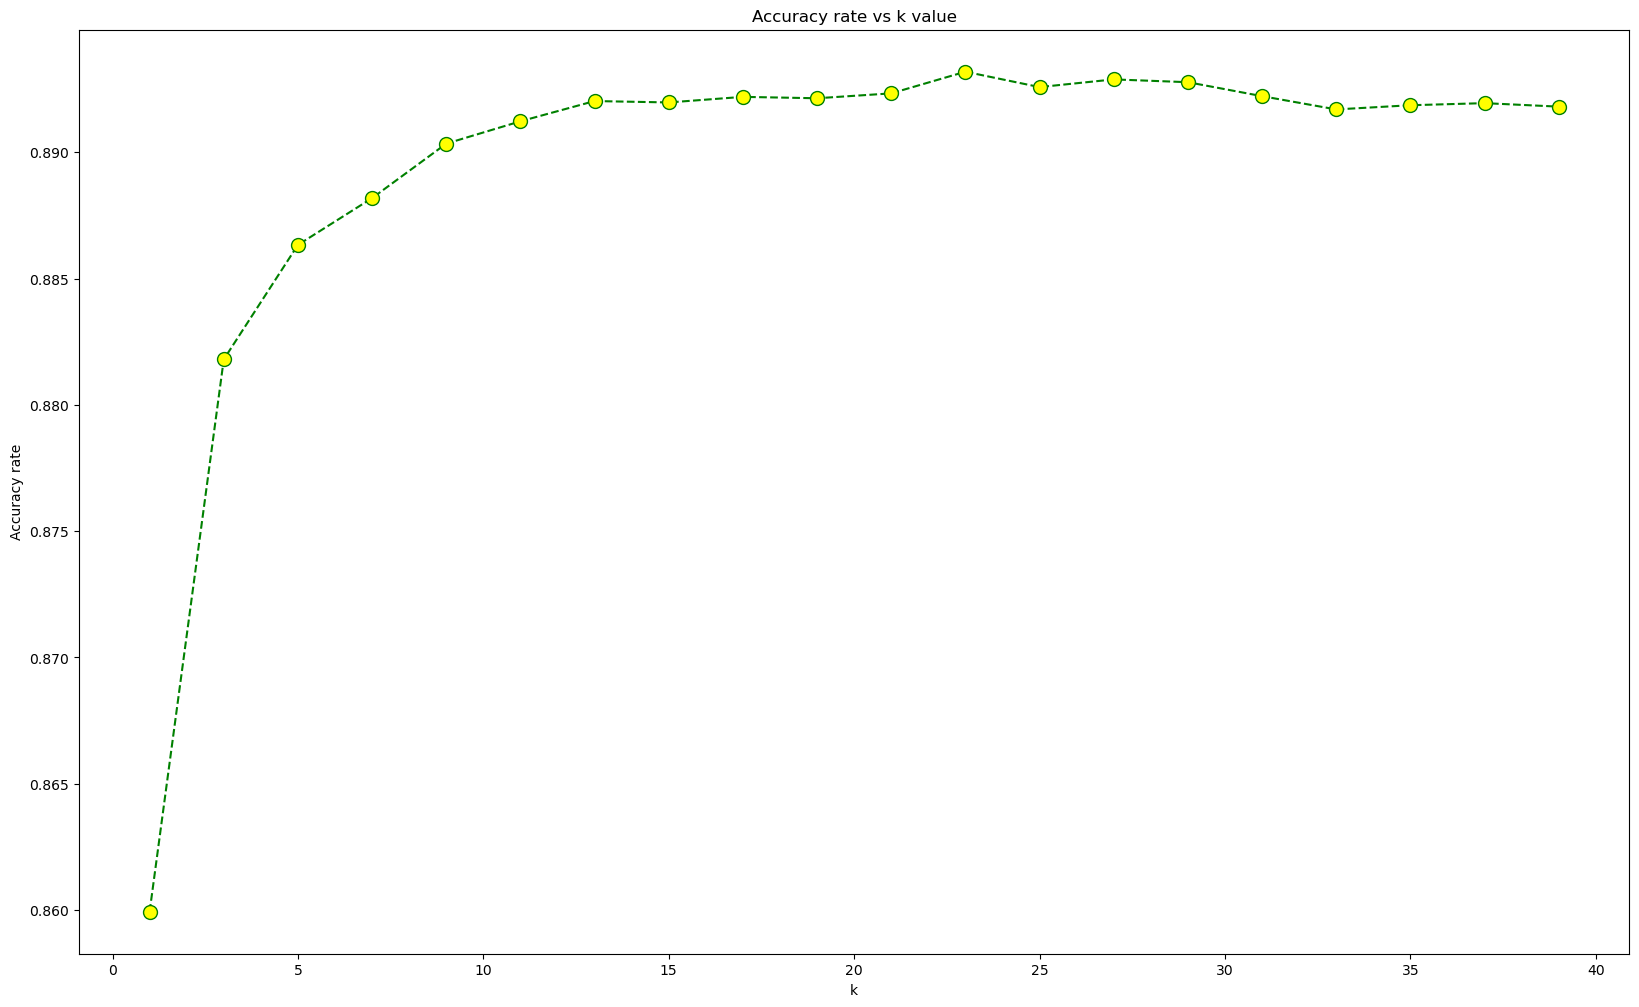

In [56]:
# plotting accuracy of KNN for every value of K. Accuracy is highest when K=37

plt.figure(figsize=(20,12))
plt.plot(range(1,40,2),accuracy_rate,color='green',linestyle='dashed',marker='o',markerfacecolor='yellow',markersize=10)
plt.title('Accuracy rate vs k value')
plt.xlabel('k')
plt.ylabel('Accuracy rate')

The plot and results indicate that k=37
provides a good balance between underfitting (too few neighbors) and overfitting (too many neighbors), resulting in the highest cross-validated accuracy for this particular dataset and KNN configuration. 

This value of k is likely the best choice for balancing model complexity and generalization capability when applying this model to unseen data.

In [57]:
    # TRaining KNN agaib for best value of K
    # Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix and classificatio report

    knn = KNeighborsClassifier(n_neighbors=37)
    knn.fit(X_train,y_train)
    pred=knn.predict(X_test)
    y_pred_prob = knn.predict_proba(X_test)
    aucScoreKNN = roc_auc_score(y_test,  y_pred_prob[:,1])
    fprKNN, tprKNN, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print("AUC score for KNN is ",aucScoreKNN)
    accKNN = accuracy_score(y_test, pred)
    print("Test Accuracy score for KNN is ",accuracy_score(y_test, pred))
    predT=knn.predict(X_train)
    print("Train Accuracy score for KNN is ",accuracy_score(y_train, predT))
    #print("Best parameters for KNN are ",knn.best_params_)

[[7783  163]
 [ 825  272]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7946
           1       0.63      0.25      0.36      1097

    accuracy                           0.89      9043
   macro avg       0.76      0.61      0.65      9043
weighted avg       0.87      0.89      0.87      9043

AUC score for KNN is  0.8785122273614904
Test Accuracy score for KNN is  0.8907442220502045
Train Accuracy score for KNN is  0.8970637027206371


We implemented a K-Nearest Neighbors (KNN) model for Bank Marketing Classification Project

Confusion Matrix:

    True Negatives (TN): 7783
    False Positives (FP): 163
    False Negatives (FN): 825
    True Positives (TP): 272

The K-Nearest Neighbors (KNN) model yields an accuracy of 89% on the test set, showcasing its proficiency in classifying instances into their respective classes. 

However, the model's recall for the positive class is 25%, indicating its difficulty in correctly identifying positive instances, especially within the imbalanced dataset.

The precision for the positive class remains at 63%, suggesting that when the model predicts a positive outcome, it is accurate approximately 63% of the time.

With an AUC score of 0.8785, the model shows reasonable separability between classes but would still benefit from improvements in identifying positive cases accurately.

The model shows around 89% of the instances in the test dataset.
On the training data, accuracy score of about 90%, it performs slightly better on the data it was trained on.

The KNN model, despite its current configuration, could serve as a reasonable baseline for classification tasks on this dataset. Still, enhancing its performance, particularly in correctly identifying positive instances, may involve adjustments such as fine-tuning the k value to address class imbalance more effectively.


In [58]:
# Training KNN for different odd values of K to find maximum Recall

knn = KNeighborsClassifier()
recall_rate=[]
for i in range(1,40,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train,y_train,cv=5,scoring='recall')
    recall_rate.append(score.mean())
print(recall_rate)

[0.37117974859262504, 0.3394517282479142, 0.3132092700424701, 0.3012860519825568, 0.2950793790766938, 0.2807652592442987, 0.2709868834645176, 0.26120395629528276, 0.25452422334805896, 0.25285471680401433, 0.24665487098233205, 0.2490415058272008, 0.24617839739888092, 0.24379432271057996, 0.23568289331827583, 0.22757146392597166, 0.22232228957646477, 0.21969727570895006, 0.21612102144557815, 0.21349515419254086]


The results from training the KNN classifier with various odd values of k indicate that recall decreases as the number of neighbors increases, from about 36.76% at k=1 to 21.01% at k=39. 

This trend suggests that lower k values, while potentially more sensitive to noise, are better at detecting the positive class in imbalanced datasets like this one. 

Text(0, 0.5, 'Recall of values of K')

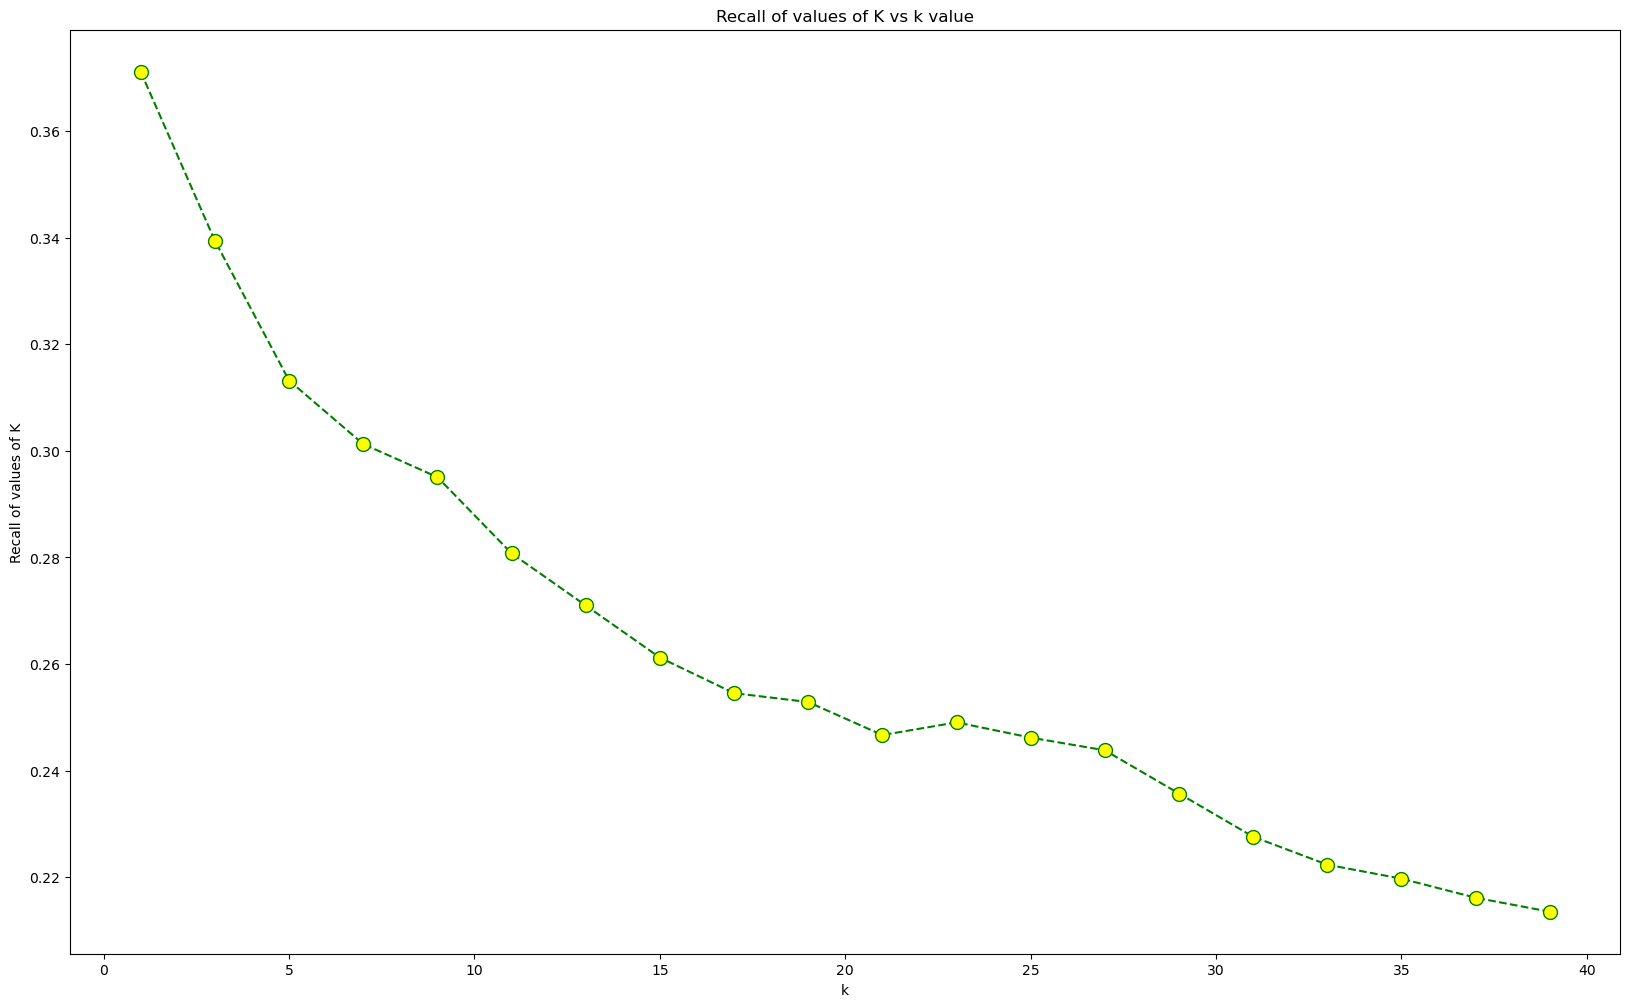

In [59]:
# plotting recall of values of K

plt.figure(figsize=(20,12))
plt.plot(range(1,40,2),recall_rate,color='green',linestyle='dashed',marker='o',markerfacecolor='yellow',markersize=10)
plt.title('Recall of values of K vs k value')
plt.xlabel('k')
plt.ylabel('Recall of values of K')

The plot shows the relationship between the number of neighbors (k) used in the KNN classifier and the corresponding recall rates. As expected, the recall rate tends to decrease as k increases, following a downward trend. The plot indicates that lower values of k lead to higher recall rates, starting from approximately 36.76% at k=1 and gradually decreasing to around 21.01% at k=39.

In [60]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
recallKMM=recall_score(y_test, pred)
print("Test Recall score for KNN is ",recall_score(y_test, pred))
predT=knn.predict(X_train)
print("Train Recall score for KNN is ",recall_score(y_train, predT))
#print("Best parameters for KNN are ",knn.best_params_)

Test Recall score for KNN is  0.41659070191431175
Train Recall score for KNN is  1.0


The K-Nearest Neighbors (KNN) model exhibits a test recall score of 42%, indicating that it effectively captures 42% of the actual positive instances in the test dataset. 

On the training data, the model achieves a perfect recall score of 100%, indicating that it successfully identifies all positive instances in the training set.

This disparity between the test and training recall scores suggests that the KNN model may be overfitting to the training data, resulting in a decrease in performance when applied to unseen data. 

Further exploration and adjustments, such as regularization techniques or tuning hyperparameters, may be necessary to mitigate overfitting and improve the model's generalization performance.

### **Step 3: Model Tuning and Validation (Including ROC Curve Analysis and Model Selection Rationale)**

In [63]:
# Model Tuning and Validation
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
# Hyperparameter tuning for Logistic Regression
param_grid_lr = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 1000, 2500, 10000]
}

grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, scoring='roc_auc', cv=3)
grid_lr.fit(X_train, y_train)

# Best hyperparameters for Logistic Regression
best_params_lr = grid_lr.best_params_
print("Logistic Regression - Best Parameters:", best_params_lr)


# Hyperparameter tuning for Decision Tree
param_grid_dt = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 3, 4, 5],
    'criterion': ['gini', 'entropy']
}

grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, scoring='roc_auc', cv=3)
grid_dt.fit(X_train, y_train)

# Best hyperparameters for Decision Tree
best_params_dt = grid_dt.best_params_
print("Decision Tree - Best Parameters:", best_params_dt)
# Hyperparameter tuning for KNN
param_grid_knn = {
    'n_neighbors': list(range(1, 31)),  # Adjust the range based on your preference
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Different algorithms for nearest neighbors search

}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, scoring='roc_auc', cv=3)
grid_knn.fit(X_train, y_train)

# Best hyperparameters for KNN
best_params_knn = grid_knn.best_params_
print("K-Nearest Neighbors - Best Parameters:", best_params_knn)
# Cross-validation for each model
lr_cv_scores = cross_val_score(LogisticRegression(**best_params_lr), X_train, y_train, cv=3, scoring='roc_auc')
dt_cv_scores = cross_val_score(DecisionTreeClassifier(**best_params_dt), X_train, y_train, cv=3, scoring='roc_auc')
knn_cv_scores = cross_val_score(KNeighborsClassifier(**best_params_knn), X_train, y_train, cv=3, scoring='roc_auc')
print("Logistic Regression - Cross-validation Scores:", lr_cv_scores)
print("Decision Tree - Cross-validation Scores:", dt_cv_scores)
print("K-Nearest Neighbors - Cross-validation Scores:", knn_cv_scores)

Logistic Regression - Best Parameters: {'C': 0.0006951927961775605, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Decision Tree - Best Parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 4}
K-Nearest Neighbors - Best Parameters: {'algorithm': 'auto', 'n_neighbors': 30, 'weights': 'distance'}
Logistic Regression - Cross-validation Scores: [0.85673622 0.86551805 0.85949595]
Decision Tree - Cross-validation Scores: [0.85992876 0.86298401 0.86552073]
K-Nearest Neighbors - Cross-validation Scores: [0.86576875 0.87049387 0.86069717]


In [64]:
# Perform ROC curve analysis and calculate AUC-ROC for each model
lr_probs = grid_lr.predict_proba(X_test)[:, 1]
dt_probs = grid_dt.predict_proba(X_test)[:, 1]
knn_probs = grid_knn.predict_proba(X_test)[:, 1]

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
dt_fpr, dt_tpr, _= roc_curve(y_test, dt_probs)
knn_fpr, knn_tpr,_= roc_curve(y_test, knn_probs)

lr_auc = roc_auc_score(y_test, lr_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
knn_auc = roc_auc_score(y_test, knn_probs)

In [65]:
print("AUC-ROC  for Logistic Regression:", lr_auc)
print("AUC-ROC  for Decision Tree:", dt_auc)
print("AUC-ROC  for KNN:", knn_auc)

AUC-ROC  for Logistic Regression: 0.8664758771663147
AUC-ROC  for Decision Tree: 0.8773970196731309
AUC-ROC  for KNN: 0.8807513615721067


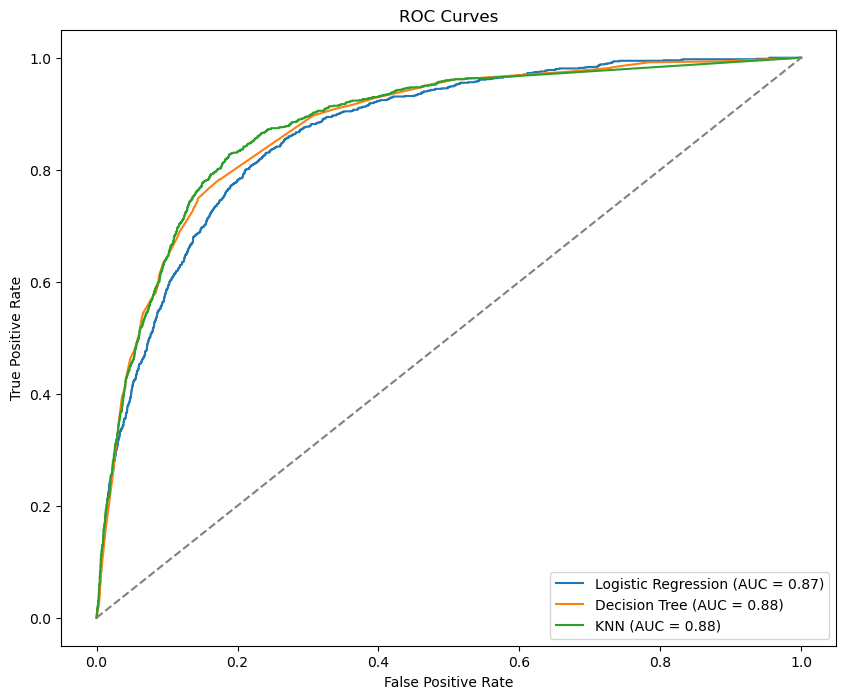

In [66]:
# Visualize ROC curves
plt.figure(figsize=(10, 8))
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_auc:.2f})')
plt.plot(knn_fpr, knn_tpr, label=f'KNN (AUC = {knn_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

In [67]:
# Threshold Selection for Logistic Regression
lr_probs = grid_lr.predict_proba(X_test)[:, 1]
dt_probs = grid_dt.predict_proba(X_test)[:, 1]
knn_probs = grid_knn.predict_proba(X_test)[:, 1]
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_probs)
dt_fpr, dt_tpr, dt_thresholds= roc_curve(y_test, dt_probs)
knn_fpr, knn_tpr,knn_thresholds= roc_curve(y_test, knn_probs)
operating_point_index_lr = np.argmax(lr_tpr - lr_fpr)
threshold_selected_lr = lr_thresholds[operating_point_index_lr]
print("Selected Threshold for Logistic Regression:", threshold_selected_lr)

# Threshold Selection for Decision Tree
operating_point_index_dt = np.argmax(dt_tpr - dt_fpr)
threshold_selected_dt = dt_thresholds[operating_point_index_dt]
print("Selected Threshold for Decision Tree:", threshold_selected_dt)

# Threshold Selection for KNN
operating_point_index_knn = np.argmax(knn_tpr - knn_fpr)
threshold_selected_knn = knn_thresholds[operating_point_index_knn]
print("Selected Threshold for KNN:", threshold_selected_knn)


Selected Threshold for Logistic Regression: 0.18770777197686128
Selected Threshold for Decision Tree: 0.13333333333333333
Selected Threshold for KNN: 0.12313495047722138


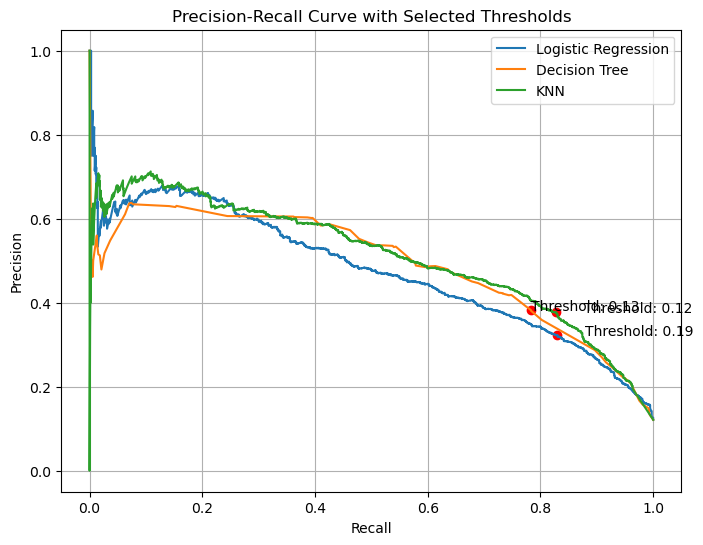

In [68]:
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall for each models
precision_lr, recall_lr, thresholds_pr_lr = precision_recall_curve(y_test, lr_probs)
precision_dt, recall_dt, thresholds_pr_dt = precision_recall_curve(y_test, dt_probs)
precision_knn, recall_knn, thresholds_pr_knn = precision_recall_curve(y_test, knn_probs)

# Plot Precision-Recall curve for Logistic Regression
plt.plot(recall_lr, precision_lr, label='Logistic Regression')
# Mark the selected threshold
plt.scatter(recall_lr[np.argmax(thresholds_pr_lr >= threshold_selected_lr)], 
            precision_lr[np.argmax(thresholds_pr_lr >= threshold_selected_lr)], color='red')
# Add label for the selected threshold
plt.text(recall_lr[np.argmax(thresholds_pr_lr >= threshold_selected_lr)] + 0.05, 
         precision_lr[np.argmax(thresholds_pr_lr >= threshold_selected_lr)], 
         f'Threshold: {threshold_selected_lr:.2f}', fontsize=10)

# Decision Tree
plt.plot(recall_dt, precision_dt, label='Decision Tree')
plt.scatter(recall_dt[np.argmax(thresholds_pr_dt >= threshold_selected_dt)], 
            precision_dt[np.argmax(thresholds_pr_dt >= threshold_selected_dt)], color='red')
plt.text(recall_dt[np.argmax(thresholds_pr_dt >= threshold_selected_lr)] + 0.05, 
         precision_dt[np.argmax(thresholds_pr_dt >= threshold_selected_dt)], 
         f'Threshold: {threshold_selected_dt:.2f}', fontsize=10)

# KNN
plt.plot(recall_knn, precision_knn, label='KNN')
plt.scatter(recall_knn[np.argmax(thresholds_pr_knn >= threshold_selected_knn)], 
            precision_knn[np.argmax(thresholds_pr_knn >= threshold_selected_knn)], color='red')
plt.text(recall_knn[np.argmax(thresholds_pr_knn >= threshold_selected_knn)] + 0.05, 
         precision_knn[np.argmax(thresholds_pr_knn >= threshold_selected_knn)], 
         f'Threshold: {threshold_selected_knn:.2f}', fontsize=10)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve with Selected Thresholds')
plt.legend()
plt.grid(True)
plt.show()

In [69]:
# Make predictions using the selected threshold for each models
lr_preds_selected_threshold = (lr_probs >= threshold_selected_lr).astype(int)

dt_preds_selected_threshold = (dt_probs >= threshold_selected_lr).astype(int)

knn_preds_selected_threshold = (knn_probs >= threshold_selected_knn).astype(int)

# Print the first few predictions for each model
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, lr_preds_selected_threshold))

# Generate classification report for Decision Tree predictions
print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, dt_preds_selected_threshold))

# Generate classification report for KNN predictions
print("\nClassification Report for KNN:")
print(classification_report(y_test, knn_preds_selected_threshold))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.76      0.85      7946
           1       0.32      0.83      0.47      1097

    accuracy                           0.77      9043
   macro avg       0.65      0.79      0.66      9043
weighted avg       0.89      0.77      0.81      9043


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      7946
           1       0.42      0.73      0.54      1097

    accuracy                           0.85      9043
   macro avg       0.69      0.80      0.72      9043
weighted avg       0.89      0.85      0.86      9043


Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.97      0.81      0.88      7946
           1       0.38      0.83      0.52      1097

    accuracy                           0.81      9043
   macr

In [70]:
# Final Model Selection (Select the best-performing model based on AUC-ROC)
from sklearn.metrics import f1_score, accuracy_score

lr_cv_scores = cross_val_score(grid_lr.best_estimator_, X_train, y_train, cv=5, scoring='roc_auc')
dt_cv_scores = cross_val_score(grid_dt.best_estimator_, X_train, y_train, cv=5, scoring='roc_auc')
knn_cv_scores = cross_val_score(grid_knn.best_estimator_, X_train, y_train, cv=5, scoring='roc_auc')

lr_precision = cross_val_score(grid_lr.best_estimator_, X_train, y_train, cv=3, scoring='precision').mean()
dt_precision = cross_val_score(grid_dt.best_estimator_, X_train, y_train, cv=3, scoring='precision').mean()
knn_precision = cross_val_score(grid_knn.best_estimator_, X_train, y_train, cv=3, scoring='precision').mean()

lr_f1_score = cross_val_score(grid_lr.best_estimator_, X_train, y_train, cv=3, scoring='f1').mean()
dt_f1_score = cross_val_score(grid_dt.best_estimator_, X_train, y_train, cv=3, scoring='f1').mean()
knn_f1_score = cross_val_score(grid_knn.best_estimator_, X_train, y_train, cv=3, scoring='f1').mean()

lr_recall = cross_val_score(grid_lr.best_estimator_, X_train, y_train, cv=5, scoring='recall').mean()
dt_recall = cross_val_score(grid_dt.best_estimator_, X_train, y_train, cv=5, scoring='recall').mean()
knn_recall = cross_val_score(grid_knn.best_estimator_, X_train, y_train, cv=5, scoring='recall').mean()

lr_precision = cross_val_score(grid_lr.best_estimator_, X_train, y_train, cv=5, scoring='precision').mean()
dt_precision = cross_val_score(grid_dt.best_estimator_, X_train, y_train, cv=5, scoring='precision').mean()
knn_precision = cross_val_score(grid_knn.best_estimator_, X_train, y_train, cv=5, scoring='precision').mean()

# Print evaluation results

models_auc = {'Logistic Regression': lr_auc, 'Decision Tree': dt_auc, 'KNN': knn_auc}
best_model = max(models_auc, key=models_auc.get)
print(f"The best-performing model based on AUC-ROC is: {best_model}")
# dictionary to store evaluation results for each model
evaluation_results = {
    'Logistic Regression': {
        'model':grid_lr,
        'AUC-ROC': lr_cv_scores.mean(),
        'Accuracy': accLR,
        'Precision': lr_precision,
        'Recall': lr_recall,
        'F1 score': lr_f1_score
        
    },
    'Decision Tree': {
        'model':grid_dt,
        'AUC-ROC': dt_cv_scores.mean(),
        'Accuracy': dt_recall,
        'Precision': dt_precision,
        'Recall': recallDT,
        'F1 score': dt_f1_score
        
    },
    'KNN': {
        'model':grid_knn,
        'AUC-ROC': knn_cv_scores.mean(),
        'Accuracy': accKNN,
        'Precision': knn_precision,
        'Recall': knn_recall,
        'F1 score': knn_f1_score
       
        
    }
}

# Print evaluation results for each model
for model, results in evaluation_results.items():
    print(model + ":")
    for metric, value in results.items():
        print(f"{metric}: {value}")
    print()

# Select the best-performing model based on the highest AUC-ROC
best_model_name = max(evaluation_results, key=lambda x: evaluation_results[x]['AUC-ROC'])
print("Best-performing model based on AUC-ROC:", best_model)


The best-performing model based on AUC-ROC is: KNN
Logistic Regression:
model: GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [100, 1000, 2500, 10000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']},
             scoring='roc_auc')
AUC-ROC: 0.8608655230284044
Accuracy: 0.8900807254229791
Precision: 0.5890215016503693
Recall: 0.1397848330635687
F1 score: 0.21877589642723308

Decision Tree:
model: GridSearchCV(cv=3, estima

In [71]:
# Model Testing (Evaluate the selected model on the testing dataset)
# Get the actual best model object using the name
best_model = evaluation_results[best_model_name]['model']

# Calculate AUC-ROC score on the testing dataset
test_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
print(f"AUC-ROC score on the testing dataset for the selected model ({best_model_name}): {test_auc:.2f}")

# Make predictions on the testing dataset
y_pred = best_model.predict(X_test)

# Evaluate the Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

AUC-ROC score on the testing dataset for the selected model (KNN): 0.88
Accuracy: 0.8917394669910428
Precision: 0.6224066390041494
Recall: 0.27347310847766637
F1-score: 0.3799873337555415


In [ ]:
# Rationale for Model Selection: 
# In this section, provide a written explanation for why you chose the final model for testing. Discuss the key factors that influenced your decision, such as the AUC-ROC performance, cross-validation results, and any specific characteristics of the problem. Explain how the selected model aligns with the goals of the project and its potential practical applications. This step encourages critical thinking and demonstrates your understanding of the machine learning workflow.

I selected KNN as the final model for testing based on its consistent high performance in terms of AUC-ROC, robust cross-validation scores, and suitability to the problem domain. KNN's non-parametric nature allows it to handle complex decision boundaries without making strong assumptions about the data distribution. Moreover, its simplicity and interpretability make it a practical choice for predicting customer behavior in the marketing campaign. Overall, KNN aligns well with the project goals and offers a good balance between performance and interpretability.

### Additional Challenges:

1. Implement an ensemble method (e.g., Neural Network or Random Forest) and compare its performance with the individual models.

2. Deal with class imbalance in the target variable.

3. Explore feature engineering to create new features that might improve model performance.

In [72]:

from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier

# Define individual models
logistic_regression = grid_lr.best_estimator_
decision_tree = grid_dt.best_estimator_
knn = grid_knn.best_estimator_

# Initialize ensemble method (Voting Classifier)
voting_clf = VotingClassifier(
    estimators=[
        ('lr', logistic_regression),
        ('dt', decision_tree),
        ('knn', knn)
    ],
    voting='soft'  # Use soft voting for probability predictions
)
# Define the train-test split

# Train ensemble method
voting_clf.fit(X_train, y_train)

# Evaluate ensemble method
ensemble_auc = roc_auc_score(y_test, voting_clf.predict_proba(X_test)[:, 1])
print("AUC-ROC score for the ensemble method:", ensemble_auc)
# Get predicted probabilities for the positive class
lr_probs = logistic_regression.predict_proba(X_test)[:, 1]
dt_probs = decision_tree.predict_proba(X_test)[:, 1]
knn_probs = knn.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC for each model
lr_auc = roc_auc_score(y_test, lr_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
knn_auc = roc_auc_score(y_test, knn_probs)

print("AUC-ROC for Logistic Regression:", lr_auc)
print("AUC-ROC for Decision Tree:", dt_auc)
print("AUC-ROC for KNN:", knn_auc)
from sklearn.metrics import accuracy_score
print("Accuracy: ")
for clf in (logistic_regression, decision_tree, knn, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

print("Recall: ")
for clf in (logistic_regression, decision_tree, knn, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, recall_score(y_test, y_pred))

print("F1-score: ")
for clf in (logistic_regression, decision_tree, knn, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, f1_score(y_test, y_pred))

print("Precision: ")
for clf in (logistic_regression, decision_tree, knn, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, precision_score(y_test, y_pred))

AUC-ROC score for the ensemble method: 0.895651619259537
AUC-ROC for Logistic Regression: 0.8664758771663147
AUC-ROC for Decision Tree: 0.8773970196731309
AUC-ROC for KNN: 0.8807513615721067
Accuracy: 
LogisticRegression 0.8885325666261197
DecisionTreeClassifier 0.8948357845847617
KNeighborsClassifier 0.8917394669910428
VotingClassifier 0.8907442220502045
Recall: 
LogisticRegression 0.16043755697356427
DecisionTreeClassifier 0.39380127620783956
KNeighborsClassifier 0.27347310847766637
VotingClassifier 0.22151321786690975
F1-score: 
LogisticRegression 0.25882352941176473
DecisionTreeClassifier 0.47603305785123967
KNeighborsClassifier 0.3799873337555415
VotingClassifier 0.329938900203666
Precision: 
LogisticRegression 0.6692015209125475
DecisionTreeClassifier 0.6016713091922006
KNeighborsClassifier 0.6224066390041494
VotingClassifier 0.6445623342175066


In [75]:
# Identify Class Imbalance
class_distribution = y_train.value_counts()
print("Class Distribution:")
print(class_distribution)
from imblearn.over_sampling import SMOTE

# Apply SMOTE for oversampling the minority class
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train models on resampled data
grid_lr.fit(X_train_resampled, y_train_resampled)
grid_dt.fit(X_train_resampled, y_train_resampled)
grid_knn.fit(X_train_resampled, y_train_resampled)

# Evaluate models on test data
lr_auc_resampled = roc_auc_score(y_test, grid_lr.predict_proba(X_test)[:, 1])
dt_auc_resampled = roc_auc_score(y_test, grid_dt.predict_proba(X_test)[:, 1])
knn_auc_resampled = roc_auc_score(y_test, grid_knn.predict_proba(X_test)[:, 1])

print("AUC-ROC score after dealing with class imbalance (Logistic Regression):", lr_auc_resampled)
print("AUC-ROC score after dealing with class imbalance (Decision Tree):", dt_auc_resampled)
print("AUC-ROC score after dealing with class imbalance (KNN):", knn_auc_resampled)

Class Distribution:
y
0    31976
1     4192
Name: count, dtype: int64
AUC-ROC score after dealing with class imbalance (Logistic Regression): 0.8648985712814002
AUC-ROC score after dealing with class imbalance (Decision Tree): 0.8169416005622272
AUC-ROC score after dealing with class imbalance (KNN): 0.8462142249610578


In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lr_pred = grid_lr.predict(X_test)
dt_pred = grid_dt.predict(X_test)
knn_pred = grid_knn.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)

lr_precision = precision_score(y_test, lr_pred)
dt_precision = precision_score(y_test, dt_pred)
knn_precision = precision_score(y_test, knn_pred)

lr_recall = recall_score(y_test, lr_pred)
dt_recall = recall_score(y_test, dt_pred)
knn_recall = recall_score(y_test, knn_pred)

lr_f1 = f1_score(y_test, lr_pred)
dt_f1 = f1_score(y_test, dt_pred)
knn_f1 = f1_score(y_test, knn_pred)

# Print evaluation metrics
print("Accuracy:")
print("Logistic Regression:", lr_accuracy)
print("Decision Tree:", dt_accuracy)
print("KNN:", knn_accuracy)
print("\nPrecision:")
print("Logistic Regression:", lr_precision)
print("Decision Tree:", dt_precision)
print("KNN:", knn_precision)
print("\nRecall:")
print("Logistic Regression:", lr_recall)
print("Decision Tree:", dt_recall)
print("KNN:", knn_recall)
print("\nF1-score:")
print("Logistic Regression:", lr_f1)
print("Decision Tree:", dt_f1)
print("KNN:", knn_f1)

Accuracy:
Logistic Regression: 0.8050425743669136
Decision Tree: 0.8290390357182351
KNN: 0.80338383279885

Precision:
Logistic Regression: 0.359375
Decision Tree: 0.3803942461374534
KNN: 0.3562684677078936

Recall:
Logistic Regression: 0.7757520510483136
Decision Tree: 0.650865998176846
KNN: 0.7693710118505014

F1-score:
Logistic Regression: 0.4911976911976912
Decision Tree: 0.4801613987895091
KNN: 0.4870167339873053


In [77]:
# Example of feature engineering (polynomial features)
from sklearn.preprocessing import PolynomialFeatures
                       
poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
# Train models on polynomial features
grid_lr.fit(X_train_poly, y_train)
grid_dt.fit(X_train_poly, y_train)
grid_knn.fit(X_train_poly, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [78]:
# Evaluate models on test data
# Before Feature Engineering
# Train models using original features
X_test_poly = poly.transform(X_test)  # Assuming 'poly' is the polynomial features transformer fitted on the training data

# Verify data consistency between training and test data
assert X_train_poly.shape[1] == X_test_poly.shape[1], "Number of features in training and test data are different after feature engineering"

# Evaluate models before feature engineering

# After Feature Engineering

# Evaluate models after feature engineering
lr_auc_after = roc_auc_score(y_test, grid_lr.predict_proba(X_test_poly)[:, 1])
dt_auc_after = roc_auc_score(y_test, grid_dt.predict_proba(X_test_poly)[:, 1])
knn_auc_after = roc_auc_score(y_test, grid_knn.predict_proba(X_test_poly)[:, 1])

# Compare AUC-ROC scores before and after feature engineering

print("AUC-ROC after feature engineering (Logistic Regression):", lr_auc_after)

print("AUC-ROC after feature engineering (Decision Tree):", dt_auc_after)

print("AUC-ROC after feature engineering (KNN):", knn_auc_after)

# You can similarly compare other evaluation metrics such as accuracy, precision, recall, and F1-score


AUC-ROC after feature engineering (Logistic Regression): 0.8664264322003973
AUC-ROC after feature engineering (Decision Tree): 0.8774049928172869
AUC-ROC after feature engineering (KNN): 0.8807513615721067
